# LCEL - LangChain Expression Language
* Notebook by Adam Lang
* Date: 6/10/2024
* In this notebook we will go over the newer way to interact with LangChain which is via the LCEL.

# What is LCEL?
* LCEL or LangChain Expression Language is a "declarative way" to easily compose chains together.
  * **This is also a more efficent and faster way to combine multiple steps into a chain.**
* It has very quickly become the "de-facto standard" to build complex LLM pipelines or chains.
* LangChain officially recommends utilizing it when building LLM applications.
* Example:
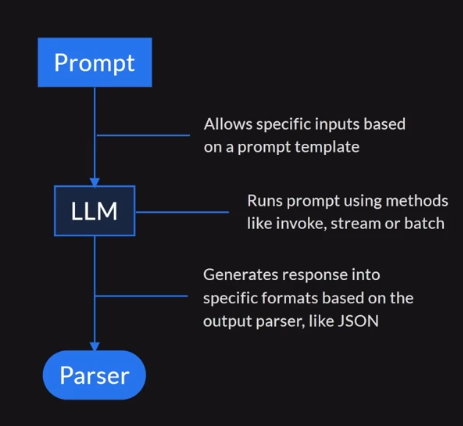

* Chaining multiple steps is easily done using the overloaded vertical bar or pipe '|' operator.
* Here is an example using LCEL to construct a chain such as the one above:
  * `chain = prompt|llm|parser`
      * This tells us the prompt flows --> LLM and generates the response which is ---> formatted using parser rules
  * The great thing about using LCEL:
      * You can run prompt methods using:
        * 1. invoke
        * 2. streaming
        * 3. batch
  * The **parser** formats the response based on output parser (e.g. JSON)


# LCEL Advantages
1. Streaming support
  * Chunks of response tokens are enabled with lower latency.
  * This streams the response live to the user.

2. Async support and parallel execution
  * Supports async API calls to handle concurrent requests on the same server.
  * You can also execute certain steps in parallel if possible.

3. Deployment, monitoring and observability
  * Can be deployed with LangServe.
    * LangServe allows you to debug and track individual steps along the way.
  * Allows access to results of intermediate steps --> log them using LangSmith for observability --> debugging and monitoring

4. Input and Output Schemas
  * Able to validate inputs and outputs based on specific schemas.

# Most Common Built-in LCEL Chain Constructors

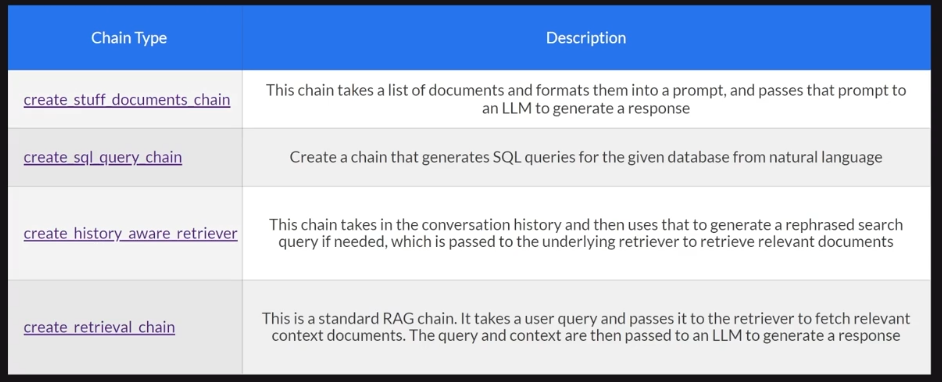

Notes about the built-in retrievers
1. create history aware retriever
  * most useful for RAG pipelines
  * uses conversation history to generate a rephrased search query
  * if needed will pass to underlying retriever to retrieve relevant documents.

2. create retrieval chain
  * "Standard RAG chain"
  * Takes user query --> retriever --> fetches relevant context documents
  * Query + context --> passed to LLM
  * Response generated

# Example using LCEL Syntax
1. Connect to ChatGPT
2. Prompt creation
3. LCEL chain built
4. Invoke chain response

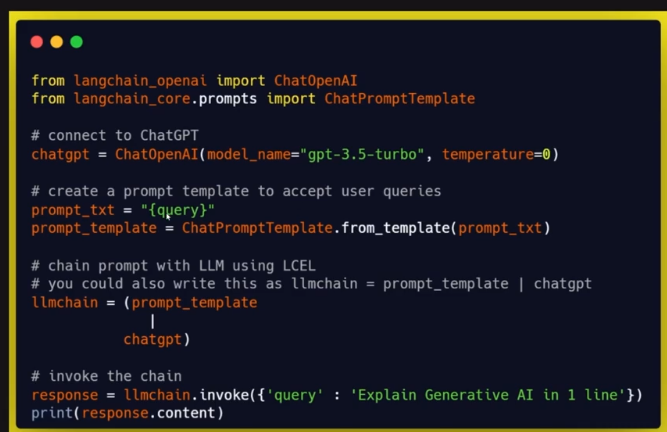


# LCEL Implementation

## install libraries

In [5]:
!pip install langchain==0.1.19
!pip install langchain-openai==0.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

## OpenAI Credentials

In [6]:
from getpass import getpass

OPENAI_KEY = getpass('Hello, please entier your custom Open AI API key: ')

Hello, please entier your custom Open AI API key: ··········


In [7]:
## setup openai
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Connect to LLM

In [8]:
from langchain_openai import ChatOpenAI

# instantiate chatgpt
chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0) #less randomness in results

## LCEL LLM Chain Creation
1. Prompt Template
2. Connect Prompt Template --> ChatGPT with LCEL

In [9]:
from langchain_core.prompts import ChatPromptTemplate


# let's create the prompt template so users can send a query to the LLM
prompt_text = "{query}"
prompt_template = ChatPromptTemplate.from_template(prompt_text)

# chain has been formatted for improved readibility
# you can also write this as an llmchain LCEL
llmchain = (prompt_template
                |
            chatgpt)

## Run LLM Chain

In [11]:
## invoke response and get response from LLM
response = llmchain.invoke({'query' : 'What is the difference between an RNN and LSTM neural networks, include in your response why an LSTM is better at handling vanishing gradients.'})

#print response
print(response.content)

Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks are both types of neural networks commonly used for sequential data processing. The main difference between the two lies in their ability to handle long-term dependencies in the data.

RNNs are designed to process sequential data by maintaining a hidden state that is updated at each time step. However, RNNs often struggle with capturing long-term dependencies in the data due to the vanishing gradient problem. This occurs when the gradients of the loss function become very small as they are backpropagated through time, leading to difficulties in learning long-range dependencies.

LSTMs, on the other hand, are a type of RNN that are specifically designed to address the vanishing gradient problem. LSTMs have a more complex architecture with additional components such as input, forget, and output gates, as well as a cell state that allows them to selectively remember or forget information over long periods of time.

# LCEL vs. "Standard" LLM invoke implementation

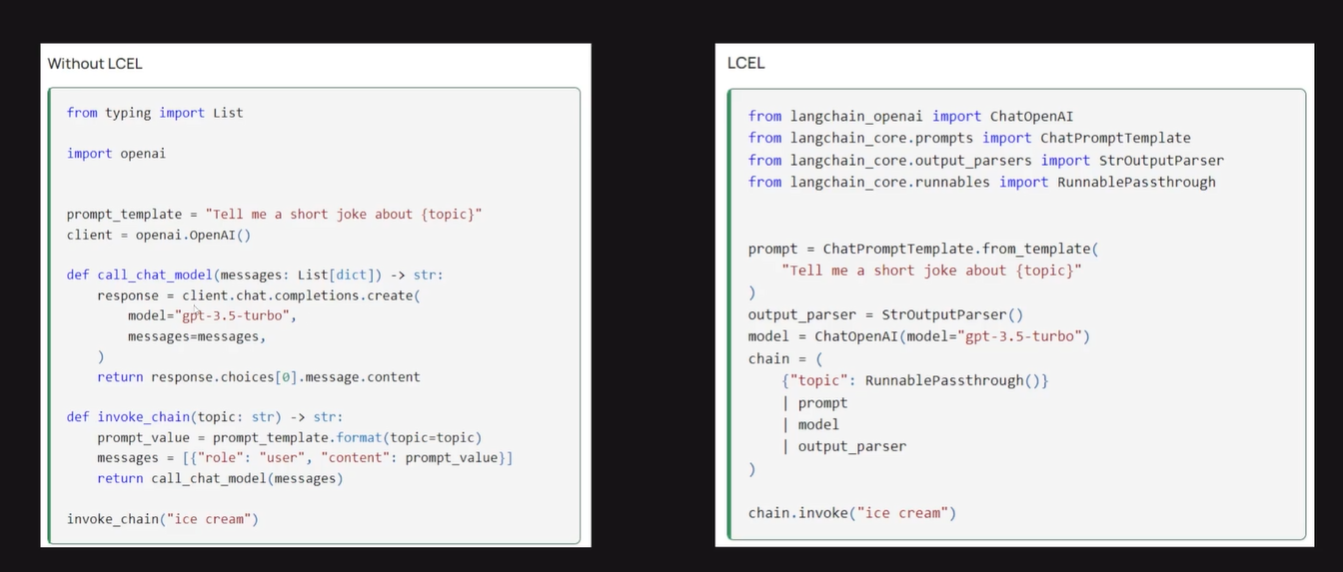

## What about Streaming Results live?
* The main advantage again with LCEL is less code and more streamlined result.
* With the "standard/classic" approach you again need to write your own functions. LCEL allows you to take advantage of the `.stream()` LangChain function which you can customize based on parameters.

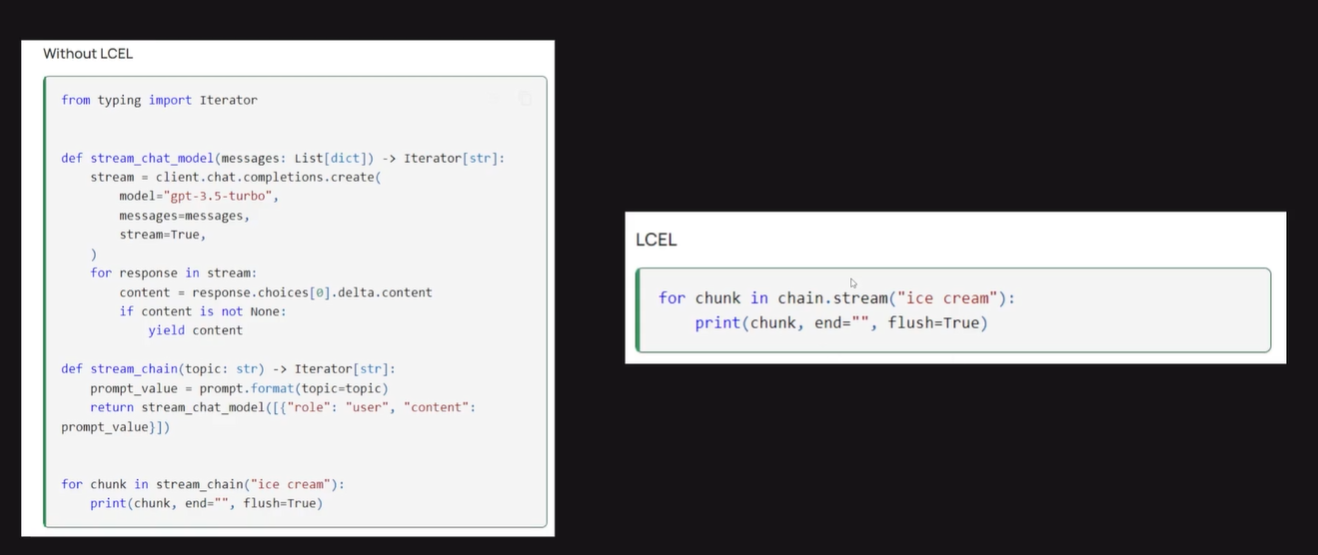

## What about Batching
* Let's say you have a bunch of prompts you want to feed to the LLM chain in "batches". Again, LCEL has a function to do this rather than having to create your own function.

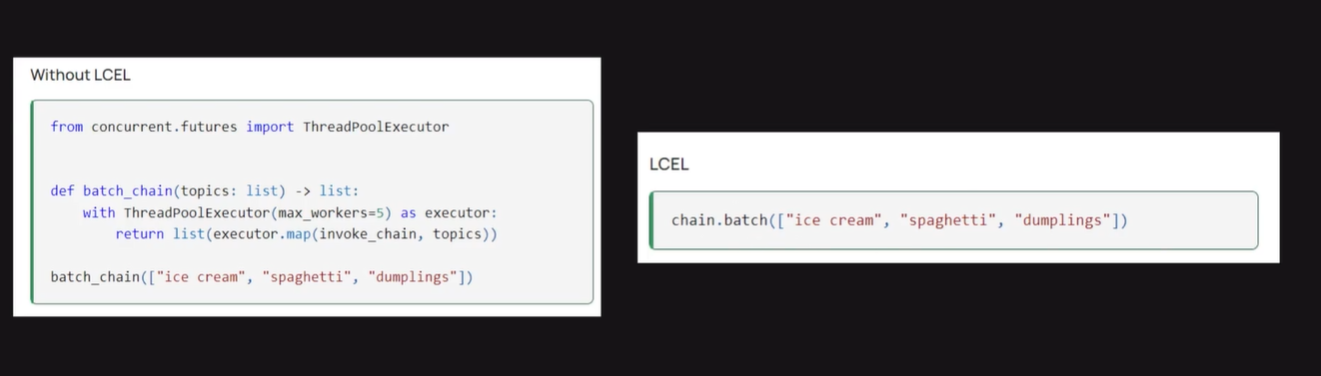

## What about Async calls?
* Again, LCEL allows you to do this with less code and less memory usage.
* You can simple utilize `await` and `.ainvoke` lanchain functions.

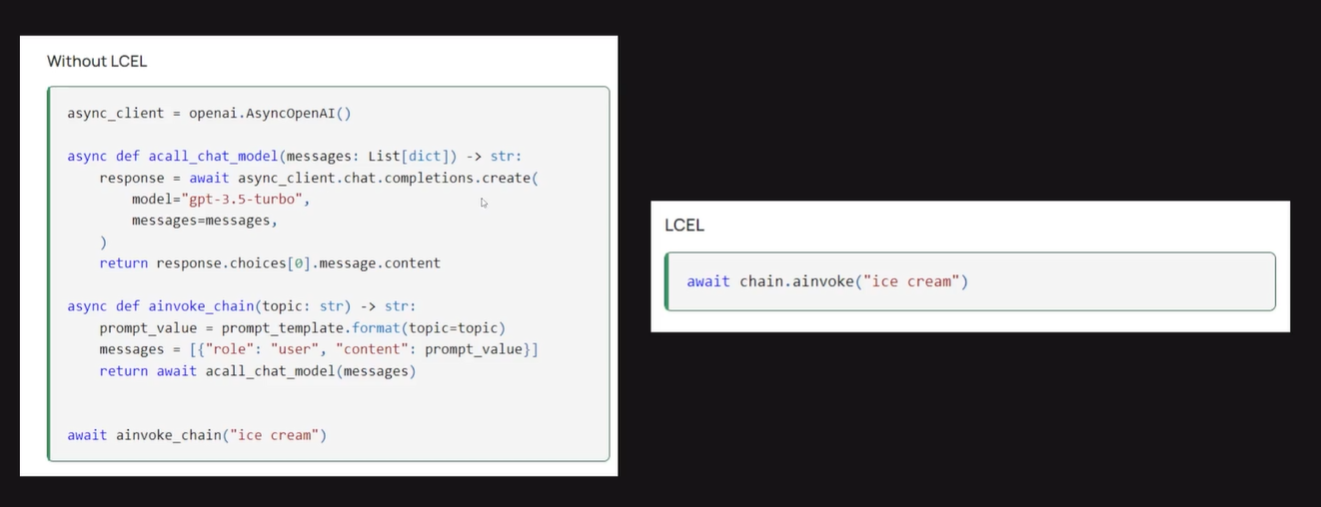

## What about switching your LLM calls?
* Without LCEL you need to create new classes, functions and LLM calls.
* With LCEL you can utilize the built-in LLM functions to call the other LLM to your chain with less code and more efficent workflow to get the same result.
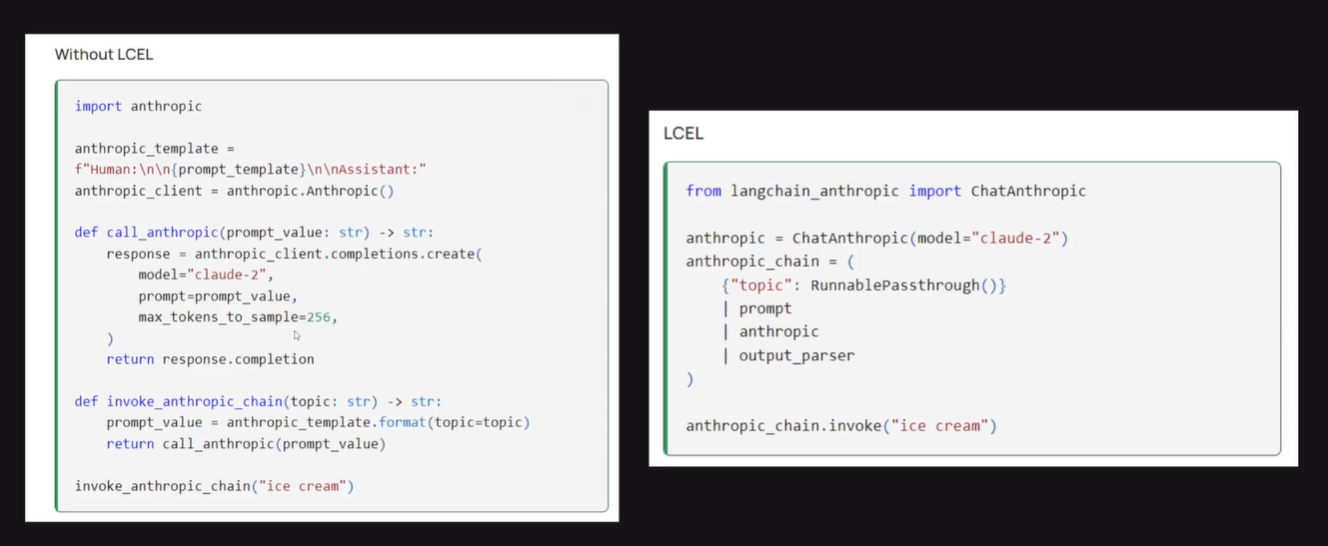

# Summary
* The idea with LCEL is you can write modular code that does not repeat itself or lend itself to longer code bases or memory usage allowing you to use built-in functions and customize them to your use case(s).
* The LCEL chain you instantiate can be used over and over again without having to recreate it with more code.